### first part
<div>
    at the first part we try to clean and prepare data. <br>
</div>

In [1]:
## import requiremets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import math
import seaborn as sns

In [2]:
path_dataset = "2018-02Final.csv" ## enter your path here
df = pd.read_csv(path_dataset, index_col=0)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,771.0,2018-02-01 00:14:16.4120,2018-02-01 00:27:08.2290,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,14536,Subscriber,1952,1
1,264.0,2018-02-01 05:14:45.1790,2018-02-01 05:19:09.6860,72,W 52 St & 11 Ave,40.767272,-73.993929,478,11 Ave & W 41 St,40.760301,-73.998842,32820,Subscriber,1965,1
2,819.0,2018-02-01 06:48:55.2290,2018-02-01 07:02:35.0290,72,W 52 St & 11 Ave,40.767272,-73.993929,405,Washington St & Gansevoort St,40.739323,-74.008119,16131,Subscriber,1968,1
3,646.0,2018-02-01 07:12:50.1740,2018-02-01 07:23:36.5280,72,W 52 St & 11 Ave,40.767272,-73.993929,2006,Central Park S & 6 Ave,40.765909,-73.976342,20831,Subscriber,1990,2
4,1312.0,2018-02-01 07:46:48.8750,2018-02-01 08:08:41.5430,72,W 52 St & 11 Ave,40.767272,-73.993929,435,W 21 St & 6 Ave,40.741740,-73.994156,15899,Subscriber,1957,1


In [3]:
"""
    fill start station latitude and start station longtitude with correct value.
    mode of values replaced with current values 
"""
for x in ["start", "end"]:
    stations = df[f"{x} station id"].unique()
    for station in stations:
        mode = df[df[f"{x} station id"] == station][f"{x} station latitude"].mode().iloc[0]
        df.loc[df[f"{x} station id"] == station, f"{x} station latitude"] = mode

"""convert to datetime"""
df["starttime"] = pd.to_datetime(df["starttime"])
df["stoptime"] = pd.to_datetime(df["stoptime"])

"""delete naT values"""
df = df[~df.starttime.isnull()]

""" add age instead of birth date"""
df["age"] = date.today().year - df["birth year"]
df.drop("birth year", axis=1, inplace=True)

"""not needed in our analysis"""
df.drop(["start station name", "end station name"], axis=1, inplace=True)

## see differences
df.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,usertype,gender,age
0,771.0,2018-02-01 00:14:16.412,2018-02-01 00:27:08.229,72,40.767272,-73.993929,379,40.749156,-73.991600,14536,Subscriber,1,70
1,264.0,2018-02-01 05:14:45.179,2018-02-01 05:19:09.686,72,40.767272,-73.993929,478,40.760301,-73.998842,32820,Subscriber,1,57
2,819.0,2018-02-01 06:48:55.229,2018-02-01 07:02:35.029,72,40.767272,-73.993929,405,40.739323,-74.008119,16131,Subscriber,1,54
3,646.0,2018-02-01 07:12:50.174,2018-02-01 07:23:36.528,72,40.767272,-73.993929,2006,40.765909,-73.976342,20831,Subscriber,2,32
4,1312.0,2018-02-01 07:46:48.875,2018-02-01 08:08:41.543,72,40.767272,-73.993929,435,40.741740,-73.994156,15899,Subscriber,1,65


In [4]:
df.starttime.max()

Timestamp('2018-02-28 23:59:51.595000')

In [5]:
def part_of_day(hour, minute):
    "this function returns the part of the day based of project definition"
    return hour*4 + int(minute/15)

df["part_of_day"] = df["starttime"].apply(lambda x: part_of_day(x.hour, x.minute))
df["hour_of_day"] = df["starttime"].apply(lambda x: x.hour)

In [6]:
path = "weather of state NY.xlsx"
weather_df = pd.read_excel(path)
weather_df = weather_df[weather_df["StartTime(UTC)"] >= "2018-02-01 00:14:16.4120"] \
    [weather_df["StartTime(UTC)"] <= "2018-03-10 23:59:51.595000"].reset_index(drop=True)

<ipython-input-6-b772a06293e1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weather_df = weather_df[weather_df["StartTime(UTC)"] >= "2018-02-01 00:14:16.4120"] \


In [7]:
cities = weather_df.drop_duplicates(subset=["City"], keep="first")[["LocationLat","LocationLng", "City"]].values
cities

array([[42.1534, -79.258, 'Jamestown'],
       [44.9358, -74.8455, 'Massena'],
       [42.5709, -77.7131, 'North Dansville'],
       [41.7016, -74.795, 'Bethel'],
       [40.6392, -73.7639, 'Jamaica'],
       [42.1078, -77.9842, 'Wellsville'],
       [43.3504, -76.3832, 'Fulton'],
       [40.779, -73.9692, 'New York'],
       [44.0556, -75.7195, 'Fort Drum'],
       [41.073, -71.9235, 'Montauk']], dtype=object)

In [8]:
def get_city(item):
    min_loss = 100
    
    for city in cities:
        city_lat = city[0]
        city_lng = city[1]  
        loss = math.sqrt(
            (item["start station latitude"] - city_lat)**2 +
            (item["start station longitude"] - city_lng)**2 
        ) 
        if loss < min_loss:
            min_loss = loss
            target_city = city[2]
            
    return target_city
        
    

In [9]:
df["City"] = df.apply(get_city, axis=1)

In [10]:
weather_info = {}
for city in [i[2] for i in cities]:
    data = weather_df[weather_df.City == city].sort_values("StartTime(UTC)")
    data["StartTime(UTC)"] = pd.to_datetime(data["StartTime(UTC)"])
    weather_info[city] = data.values

In [11]:
def get_weather(item):
    city = item["City"]
    
    for record in weather_info[city]:
        if record[3] > item["starttime"]:
            return record[1]
    
df["weather"] = df.apply(get_weather, axis=1)

In [12]:
df

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,usertype,gender,age,part_of_day,hour_of_day,City,weather
0,771.0,2018-02-01 00:14:16.412,2018-02-01 00:27:08.229,72,40.767272,-73.993929,379,40.749156,-73.991600,14536,Subscriber,1,70,0,0,New York,Rain
1,264.0,2018-02-01 05:14:45.179,2018-02-01 05:19:09.686,72,40.767272,-73.993929,478,40.760301,-73.998842,32820,Subscriber,1,57,20,5,New York,Rain
2,819.0,2018-02-01 06:48:55.229,2018-02-01 07:02:35.029,72,40.767272,-73.993929,405,40.739323,-74.008119,16131,Subscriber,1,54,27,6,New York,Rain
3,646.0,2018-02-01 07:12:50.174,2018-02-01 07:23:36.528,72,40.767272,-73.993929,2006,40.765909,-73.976342,20831,Subscriber,2,32,28,7,New York,Rain
4,1312.0,2018-02-01 07:46:48.875,2018-02-01 08:08:41.543,72,40.767272,-73.993929,435,40.741740,-73.994156,15899,Subscriber,1,65,31,7,New York,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843109,510.0,2018-02-28 20:54:35.412,2018-02-28 21:03:06.282,3664,40.720195,-74.010301,306,40.708235,-74.005301,32273,Subscriber,1,31,83,20,New York,Rain
843110,1953.0,2018-02-28 20:57:26.001,2018-02-28 21:29:59.728,3664,40.720195,-74.010301,247,40.735354,-74.004831,17402,Subscriber,1,29,83,20,New York,Rain
843111,562.0,2018-02-28 21:15:38.634,2018-02-28 21:25:01.566,3664,40.720195,-74.010301,279,40.707873,-74.001670,25439,Subscriber,1,31,85,21,New York,Rain
843112,1013.0,2018-02-28 21:43:14.654,2018-02-28 22:00:08.546,3664,40.720195,-74.010301,3632,40.728049,-73.978812,15068,Subscriber,1,28,86,21,New York,Rain


In [13]:
bike_df = pd.read_excel("BikeType.xlsx")
bike_df = bike_df[["type", "bikeID"]]

"""
    convert current excel file to appropriate format to merge main df
"""
col_bike = ["type_bike", "bikeid"]
bike_df_ = pd.DataFrame(columns = col_bike)

for i in bike_df.index:
    bike_ids = bike_df.loc[i, "bikeID"].split()
    for id in bike_ids:
        bike_df_ = bike_df_.append(
            pd.Series([
                bike_df.loc[i, "type"], 
               int(id),
            ],
            index = col_bike
            ), ignore_index = True
        )
bike_df_.head()

,type_bike,bikeid
0,classic-bike,14529
1,classic-bike,14530
2,classic-bike,14531
3,classic-bike,14532
4,classic-bike,14533


In [14]:
df = df.merge(bike_df_, how='left',on="bikeid" )
df.drop("bikeid", axis=1, inplace=True)

In [15]:
## od matrix

def od_matrix(part_of_day= None):
    if part_of_day == None:
        odf = df.loc[:, ["start station id", "end station id"]]
    else:
        odf = df.loc[:, ["start station id", "end station id"]][df["part_of_day"] == part_of_day]
    stations = df["end station id"].unique()
    return pd.DataFrame(0, index=stations, columns =stations
                    ).add(odf.pivot_table(values='end station id', index="start station id",
                                         columns='end station id', aggfunc=len),
                          fill_value=0).astype('int')
od_matrix()

,72,79,82,83,119,120,127,128,143,144,...,3654,3656,3658,3659,3660,3661,3662,3663,3664,3668
72,33,4,0,0,0,0,8,2,0,0,...,0,1,5,1,2,0,0,0,1,0
79,12,45,0,0,0,0,25,9,0,0,...,0,4,3,0,3,0,0,0,11,0
82,0,0,19,0,0,1,0,1,0,0,...,0,5,1,0,0,0,0,0,0,0
83,0,0,0,8,1,10,0,1,1,1,...,0,0,0,0,0,1,0,1,0,0
119,0,0,0,0,1,0,0,1,0,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,0,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3662,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,0,0
3663,0,0,0,9,0,3,0,1,0,0,...,0,0,0,0,0,0,0,4,0,0
3664,7,15,0,0,0,0,12,9,0,0,...,0,5,3,0,1,0,0,0,22,0


In [16]:
del bike_df_
del bike_df
del weather_df

### second part

#### Exploratory data analysis
- features
- distributions
- plots to get better intuition

In [17]:
df.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,gender,age,part_of_day,hour_of_day,City,weather,type_bike
0,771.0,2018-02-01 00:14:16.412,2018-02-01 00:27:08.229,72,40.767272,-73.993929,379,40.749156,-73.991600,Subscriber,1,70,0,0,New York,Rain,classic-bike
1,264.0,2018-02-01 05:14:45.179,2018-02-01 05:19:09.686,72,40.767272,-73.993929,478,40.760301,-73.998842,Subscriber,1,57,20,5,New York,Rain,docked-bike
2,819.0,2018-02-01 06:48:55.229,2018-02-01 07:02:35.029,72,40.767272,-73.993929,405,40.739323,-74.008119,Subscriber,1,54,27,6,New York,Rain,classic-bike
3,646.0,2018-02-01 07:12:50.174,2018-02-01 07:23:36.528,72,40.767272,-73.993929,2006,40.765909,-73.976342,Subscriber,2,32,28,7,New York,Rain,classic-bike
4,1312.0,2018-02-01 07:46:48.875,2018-02-01 08:08:41.543,72,40.767272,-73.993929,435,40.741740,-73.994156,Subscriber,1,65,31,7,New York,Rain,classic-bike


In [18]:
df.usertype.value_counts()

Subscriber        809279
Customer           33333
not Subscriber         1
Name: usertype, dtype: int64

In [19]:
## not subscriber is an outlier
df = df[df["usertype"] != "not Subscriber"]

<AxesSubplot:xlabel='age', ylabel='Count'>

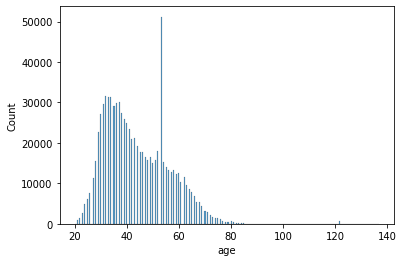

In [20]:
sns.histplot(df.age)

In [21]:
### age
df.age.describe().astype(int).reset_index()

,index,age
0,count,842612
1,mean,43
2,std,12
3,min,20
4,25%,34
5,50%,42
6,75%,53
7,max,137


In [22]:
### part of day
df.part_of_day.describe().astype(int).reset_index()

,index,part_of_day
0,count,842612
1,mean,55
2,std,19
3,min,0
4,25%,38
5,50%,58
6,75%,72
7,max,95


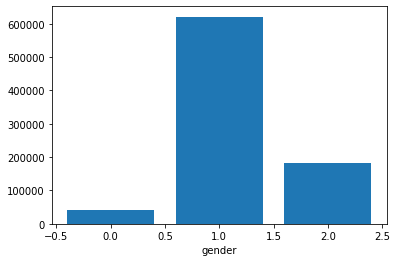

In [23]:
### gender
people_count = df.gender.value_counts()
plt.bar(people_count.keys(),people_count.values)
plt.xlabel("gender")
plt.show()


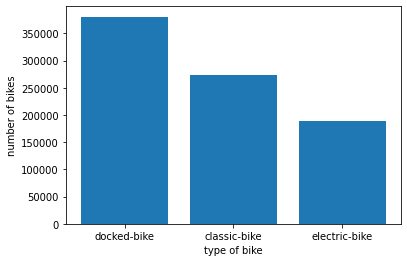

In [24]:
bike_types= df.type_bike.value_counts()
plt.bar(bike_types.keys(), bike_types.values)
plt.ylabel("number of bikes")
plt.xlabel("type of bike")
plt.show()

In [25]:
## describe trip durations
df.tripduration.describe().astype(int).reset_index()

,index,tripduration
0,count,842112
1,mean,877
2,std,33903
3,min,61
4,25%,319
5,50%,519
6,75%,872
7,max,15962256


In [26]:
def calculate_distance(item: pd.Series) -> float:
    """this function calculates distance in kilo-meter
        Parameters:
        ------------
            - item: pd.Series 
                a record of dataframe
    """

    R = 6373.0
    lat1 = math.radians(item["start station latitude"])
    lon1 = math.radians(item["start station longitude"])
    lat2 = math.radians(item["end station latitude"])
    lon2 = math.radians(item["end station longitude"])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

def calculate_velocity(item: pd.Series) -> float:
    """this function calculates velocity in km/h
    Parameters:
        ------------
            - item: pd.Series 
                a record of dataframe
    """
    return item["distance"] / item["tripduration"] * 3600

In [27]:
df["distance"] = df.apply(calculate_distance, axis=1)
df["velocity"] = df.apply(calculate_velocity, axis=1)

In [28]:
mean_velocity = df.velocity.mean()
std_velocity = df.velocity.std()

### remove outliers to see velocity distribution. we use alfa=0.05 so k0.025= 1.96
df = df[df.velocity > mean_velocity - 1.96 * std_velocity][df.velocity < mean_velocity + 1.96 * std_velocity]

<ipython-input-28-4847cd486699>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.velocity > mean_velocity - 1.96 * std_velocity][df.velocity < mean_velocity + 1.96 * std_velocity]


<AxesSubplot:xlabel='velocity', ylabel='Count'>

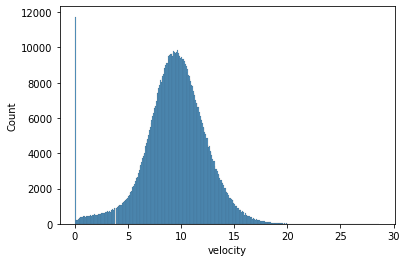

In [29]:
### a nice normal distribution as expected
sns.histplot(df.velocity)

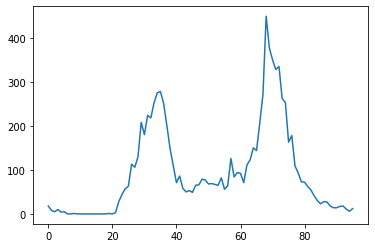

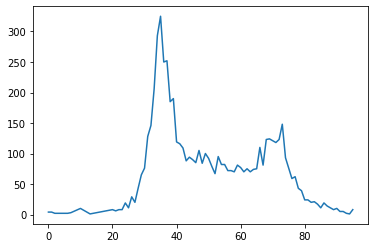

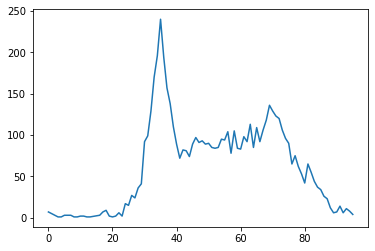

In [30]:
## trips base on part of day for three high traffic stations
plt.plot(df[df["end station id"] == 519].groupby("part_of_day")["end station id"].count())
plt.show()
plt.plot(df[df["end station id"] == 402].groupby("part_of_day")["end station id"].count())
plt.show()
plt.plot(df[df["end station id"] == 435].groupby("part_of_day")["end station id"].count())
plt.show()

<AxesSubplot:xlabel='usertype'>

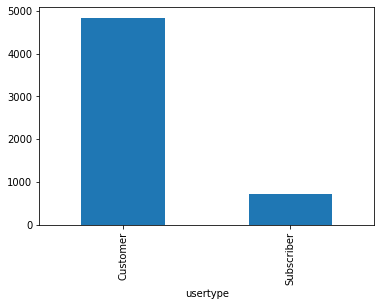

In [31]:
trip_duration_usertype= df.groupby("usertype")["tripduration"].mean()
trip_duration_usertype.plot.bar()

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\n    it seems the distribution is chi-square dist!\n'

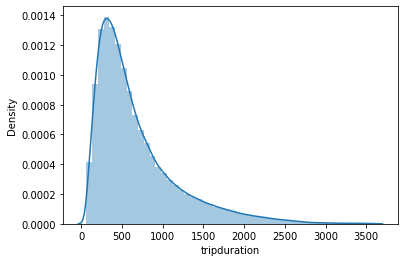

In [32]:
## delete trips more than 1H to show better trip duration distribution
sns.distplot(df[df.tripduration < 3600].tripduration)
"""
    it seems the distribution is chi-square dist!
"""

### third part

#### velocity analysis and find best new-station location

In [33]:
velocity_df = df.groupby(["type_bike", "usertype", "gender"])["velocity"].mean().reset_index()
velocity_df.head()

,type_bike,usertype,gender,velocity
0,classic-bike,Customer,0,5.400822
1,classic-bike,Customer,1,5.990663
2,classic-bike,Customer,2,5.590934
3,classic-bike,Subscriber,0,9.136311
4,classic-bike,Subscriber,1,9.592368


<AxesSubplot:xlabel='usertype'>

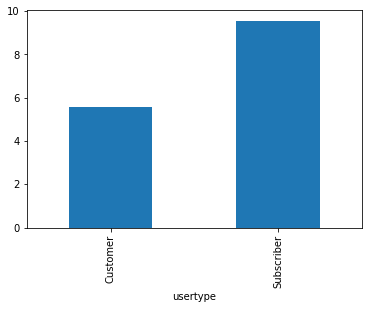

In [34]:
## difference between different types of users
df.groupby("usertype")["velocity"].mean().plot.bar()

In [35]:
## velocity in type 1 is the fastest. then type 2 and at last type 0
df.groupby("gender")["velocity"].mean()

gender
0    6.899483
1    9.736226
2    8.812277
Name: velocity, dtype: float64

In [36]:
## electric bikes seems to be faster!
df.groupby("type_bike")["velocity"].mean()

type_bike
classic-bike     9.170239
docked-bike      9.455612
electric-bike    9.631544
Name: velocity, dtype: float64

In [37]:
stations = df.drop_duplicates(
    subset=["start station id"]
)[["start station id", "start station latitude", "start station longitude"]].values
stations

array([[  72.        ,   40.76727216,  -73.99392888],
       [  79.        ,   40.71911552,  -74.00666661],
       [  82.        ,   40.71117416,  -74.00016545],
       ...,
       [3662.        ,   40.7612939 ,  -73.91691685],
       [3663.        ,   40.67716489,  -73.97382796],
       [3664.        ,   40.72019521,  -74.01030064]])

In [38]:
od = od_matrix().values
totoal_traffic = []

for i in range(2,len(od)):
    for j in range(1,i):
        for k in range(j):
            traffic = od[i,j] + od[j,i] + od[j,k] + od[k,j] + od[i,k] + od[k,i]
            
            totoal_traffic.append(
                (i,j,k, traffic)
            )

In [39]:
sorted_by_traffic = sorted(totoal_traffic, key=lambda tup: tup[3])
sorted_by_traffic[-2:]

[(339, 278, 206, 1169), (439, 182, 89, 1234)]

In [40]:
od = od_matrix().reset_index().rename(columns={"index":"station"})

In [41]:
print("3 first high traffic stations:")
print(od.loc[439, "station"], od.loc[182, "station"], od.loc[89, "station"])
print("total traffic:", 1234)
print("3 second high traffic stations:")
print(od.loc[339, "station"], od.loc[278, "station"], od.loc[206, "station"])
print("total traffic:", 1169)

3 first high traffic stations:
3263 432 317
total traffic: 1234
3 second high traffic stations:
3093 2002 460
total traffic: 1169


In [42]:
first_station_set = []
for i in sorted_by_traffic[-1][:-1]:
    station_id = od.loc[i, "station"]
    first_station_set.append(station_id)
    
second_station_set = []
for i in sorted_by_traffic[-2][:-1]:
    station_id = od.loc[i, "station"]
    second_station_set.append(station_id)

In [43]:
del stations
station_df = df.drop_duplicates(
    subset=["start station id"]
)[["start station id", "start station latitude", "start station longitude"]]
station_df

,start station id,start station latitude,start station longitude
0,72,40.767272,-73.993929
1504,79,40.719116,-74.006667
2831,82,40.711174,-74.000165
3341,83,40.683826,-73.976323
4111,119,40.696089,-73.978034
...,...,...,...
837632,3660,40.741022,-74.001385
840397,3661,40.666439,-73.960556
840456,3662,40.761294,-73.916917
840616,3663,40.677165,-73.973828


In [44]:
def station_location(station_id):
    return station_df[station_df["start station id"] == station_id].values[0]

def center_of_gravity(station1: np.array, station2:np.array, station3:np.array):
    """find center of 3 stations"""
    lat1 = station1[1]
    lon1 = station1[2]
    lat2 = station2[1]
    lon2 = station2[2]
    lat3 = station3[1]
    lon3 = station3[2]
    return (lat1 + lat2 + lat3)/3 , (lon1 + lon2 + lon3)/3

def calculate_distance(new_station:np.array, station:pd.Series):
    R = 6373.0
    lat1 = math.radians(new_station[0])
    lon1 = math.radians(new_station[1])
    lat2 = math.radians(station["start station latitude"])
    lon2 = math.radians(station["start station longitude"])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

In [45]:
mean_velocity = df.velocity.mean()
distance_2min = 2 * mean_velocity /60

def get_new_station_location(station_set):
    station1 = station_df[station_df["start station id"] == first_station_set[0]].values[0]
    station2 = station_df[station_df["start station id"] == first_station_set[1]].values[0]
    station3 = station_df[station_df["start station id"] == first_station_set[2]].values[0]
    
    new_station = center_of_gravity(station1, station2, station3)
    
    

    for id in station_df.index:
        j=id
        dist = calculate_distance(new_station, station_df.loc[id])
        
        if dist < distance_2min:
            break
    if j == station_df.shape[0]-1:
        return new_station, i
    
    return 0,0 


new_station_location, index_i = get_new_station_location(first_station_set)
if not new_station_location: 
    new_station_location, index_i = get_new_station_location(first_station_set)


In [46]:
new_station_location

0